-  Fix import module error by adding modules path to the sys path env variable

In [1]:

import sys,os
sys.path.append(os.getcwd() + '/scripts')
print(os.getcwd() + 'scripts')


/home/zaxo7/WorkSpace/DEEP LEARNING/DO-U-Netscripts


In [2]:
from scripts import run, data
import glob

import numpy as np
import matplotlib.pyplot as plt

2022-04-19 23:24:53.160464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-19 23:24:53.160513: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
DOU_NET = run.run_training('Test_scale')

2022-04-18 17:59:09.247590: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/zaxo7/tensorflow/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-18 17:59:09.247619: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-18 17:59:09.247635: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (zx-d): /proc/driver/nvidia/version does not exist
2022-04-18 17:59:09.247888: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/zaxo7/.local/lib/python3.8

Instructions for updating:
Use fn_output_signature instead
8/8 [==============================] - ETA: 0s - loss: 0.6604 - mask_loss: 0.3069 - edge_loss: 0.8119 - mask_mean_iou: 0.4170 - mask_dsc: 0.5806 - mask_tversky: 0.6931 - edge_mean_iou: 0.0652 - edge_dsc: 0.1222 - edge_tversky: 0.1881
Epoch 1: val_loss improved from inf to 0.59801, saving model to models/Test_scale_best.h5
8/8 [==============================] - 78s 10s/step - loss: 0.6604 - mask_loss: 0.3069 - edge_loss: 0.8119 - mask_mean_iou: 0.4170 - mask_dsc: 0.5806 - mask_tversky: 0.6931 - edge_mean_iou: 0.0652 - edge_dsc: 0.1222 - edge_tversky: 0.1881 - val_loss: 0.5980 - val_mask_loss: 0.2154 - val_edge_loss: 0.7620 - val_mask_mean_iou: 0.5227 - val_mask_dsc: 0.6861 - val_mask_tversky: 0.7844 - val_edge_mean_iou: 0.0858 - val_edge_dsc: 0.1579 - val_edge_tversky: 0.2381


In [5]:
DOU_NET.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 380, 380, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 378, 378, 96  2688        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 378, 378, 96  384        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [6]:
test_img_files = glob.glob('data/test/*.jpg')

imgs, mask, edge = data.load_data(test_img_files)
img_chips, mask_chips, edge_chips = data.test_chips(imgs, mask,
                                                                edge=edge,
                                                                padding=200,
                                                                input_size=380,
                                                                output_size=196)

In [7]:
len(imgs)

3

In [8]:
imgs[1].shape

(1052, 1626, 3)

in the test database we have 3 images with size of (1052, 1626, 3)

In [9]:
len(img_chips)

278

In [10]:
img_chips[1].shape

(380, 380, 3)

each image gets sliced to multiple slices of size (188, 188, 3)

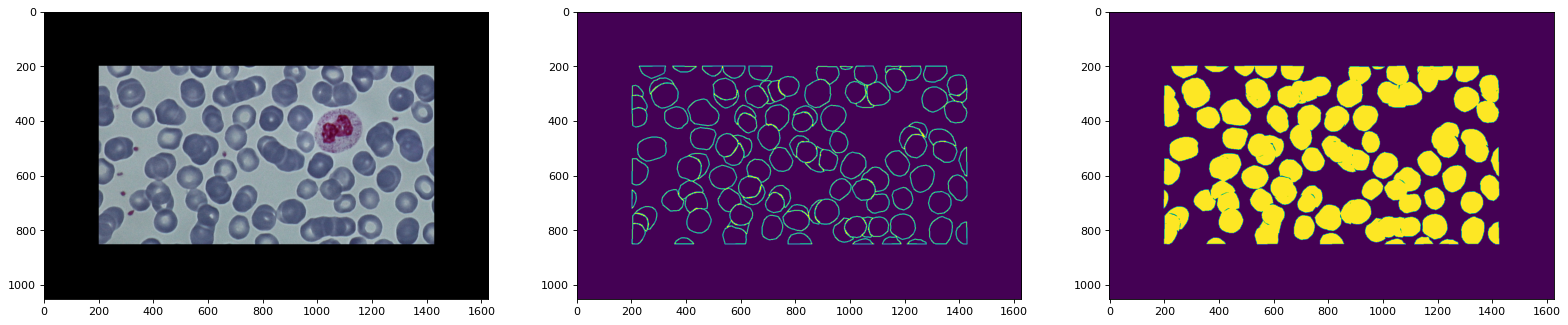

In [11]:
fig = plt.figure(figsize=(25, 10), dpi=80)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = fig.add_subplot(2, 3, 1)
ax.imshow(imgs[1])
ax = fig.add_subplot(2, 3, 2)
ax.imshow(edge[1])
ax = fig.add_subplot(2, 3, 3)
ax.imshow(mask[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


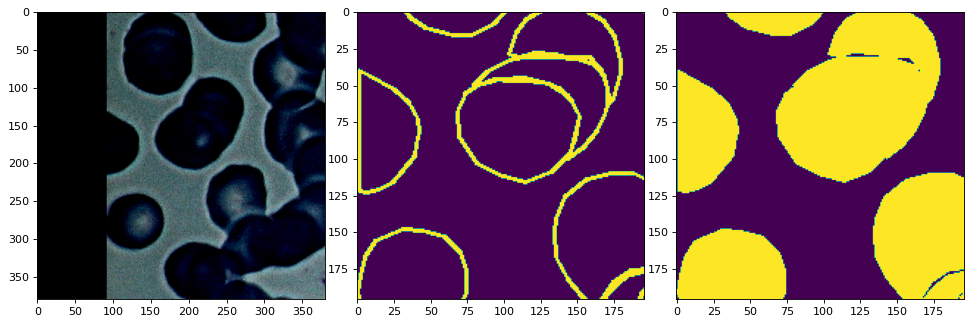

In [12]:
ind = 200
fig = plt.figure(figsize=(15, 10), dpi=80)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = fig.add_subplot(2, 3, 1)
ax.imshow(img_chips[ind])
ax = fig.add_subplot(2, 3, 2)
ax.imshow(edge_chips[ind])
ax = fig.add_subplot(2, 3, 3)
ax.imshow(mask_chips[ind])

In [13]:
pred = np.array([img_chips[ind]])

pred.shape

(1, 380, 380, 3)

In [14]:
output = DOU_NET.model.predict(pred)

In [15]:
output = np.squeeze(output)

output.shape

(2, 196, 196)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


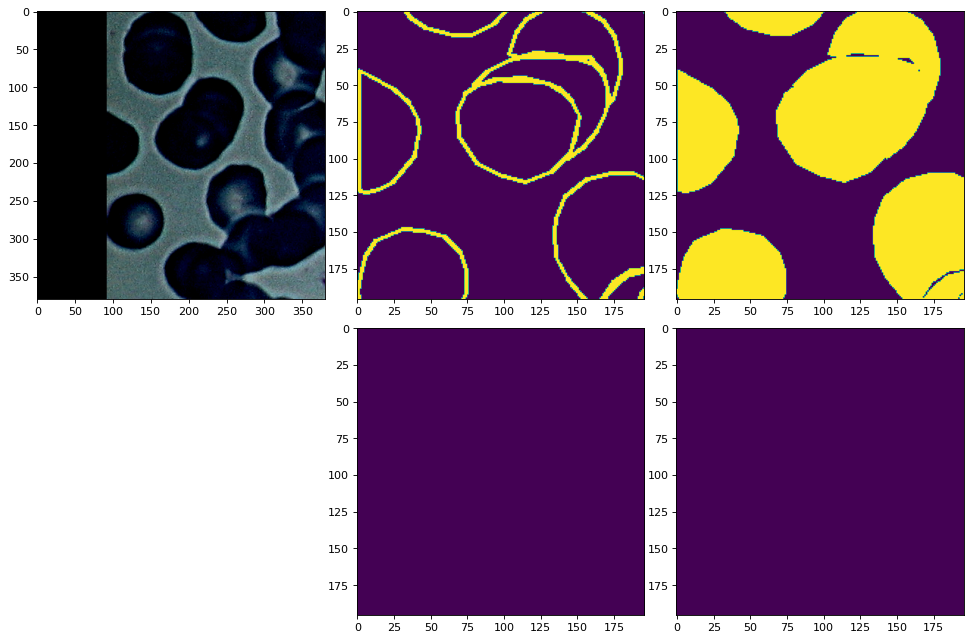

In [16]:
fig = plt.figure(figsize=(15, 10), dpi=80)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = fig.add_subplot(2, 3, 1)
ax.imshow(img_chips[ind])
ax = fig.add_subplot(2, 3, 2)
ax.imshow(edge_chips[ind])
ax = fig.add_subplot(2, 3, 3)
ax.imshow(mask_chips[ind])
ax = fig.add_subplot(2, 3, 5)
ax.imshow(output[0])
ax = fig.add_subplot(2, 3, 6)
ax.imshow(output[1])